# Statistics for Artificial Intelligence and Data Science 


The aim of this analysis is to analyse the variability of the regression models by interchanging the predictor variables from the 'storks-humans' dataset.  

#### Analysis 1A
   - Model 1 (Predictor - Storks)
      1. Exploratory analysis of variables 
      2. Correlation between the predictor and target
      3. Regression fit and residuals
      4. Coefficient of determination
   
   - Model 2 (Predictor - Humans)
      1. Exploratory analysis of variables 
      2. Correlation between the predictor and target
      3. Regression fit and residuals
      4. Coefficient of determination

#### Analysis 1B
   1. Bootstrap function definition
   2. Regression function definition
   3. Plotting R^2 difference 
   4. Estimating appropriate Confidence interval
   4. Determining variability of models 

#### Analysis 2A
   - Model 1 (Predictor- Land area)
      1. Correlation between the predictor and target
      2. Regression fit and residuals
      3. Root mean squared error
      
   - Model 2 (Predictor - Suitable area percent, population density)
      1. Correlation between the predictor and target
      2. Regression fit and residuals
      3. Root mean squared error
      
#### Analysis 2B
   1. Regression function definition
   2. Plotting RMSE difference 
   3. Estimating appropriate Confidence interval
   4. Determining variability of models 

#### Summary

## Analysis 1A

### Model 1

### 1. Exploratory data analysis of variables

In [1]:
#Import necessary modules for data analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#import necessary modules for prediction
from sklearn.linear_model import LinearRegression


from sklearn.metrics import mean_squared_error

In [2]:
#import dataset into pandas dataframe
df = pd.read_csv('storks.csv')
df

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent
0,Albania,28750,100,3.2,83,55.68
1,Austria,83860,300,7.6,87,38.34
2,Belgium,30520,1,9.9,118,65.93
3,Bulgaria,111000,5000,9.0,117,57.99
4,Denmark,43100,9,5.1,59,81.46
5,France,544000,140,56.0,774,58.47
6,Germany,357000,3300,78.0,901,59.81
7,Greece,132000,2500,10.0,106,47.31
8,Holland,41900,4,15.0,188,70.96
9,Hungary,93000,5000,11.0,124,75.86


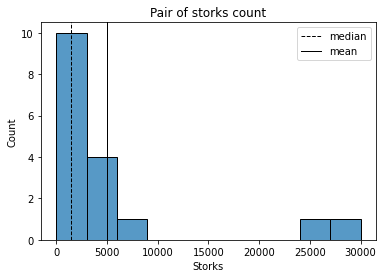

In [3]:
#Visualising the distribution for the predictor variable - Storks
sns.histplot(df['Storks'],bins = 10)
plt.axvline(df.Storks.median(), color='k', linestyle = 'dashed', linewidth= 1, label = 'median')
plt.axvline(df.Storks.mean(), color = 'k', linestyle = 'solid', linewidth = 1, label = 'mean')
plt.xlabel('Storks')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.title('Pair of storks count')
plt.show()

By visualising the distribution of the numbers of pairs of storks,the data is positively skewed. We can discern from this distibution that majority of the countries from the dataset (over 10 countries) are home grounds to a maximum of 5000 pairs of storks. While there 4 countries with almost 10000 and 2 countries that house 25000 and 30000 stork pairs.  

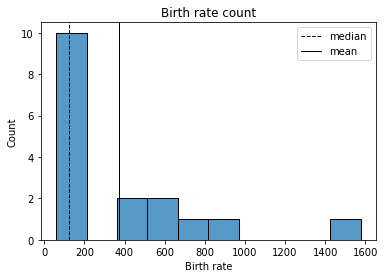

In [4]:
#Visualising the distribution for the target variable - Birth rate 
sns.histplot(df['BirthRate'],bins = 10)
plt.axvline(df.BirthRate.median(), color='k', linestyle = 'dashed', linewidth= 1, label = 'median')
plt.axvline(df.BirthRate.mean(), color = 'k', linestyle = 'solid', linewidth = 1, label = 'mean')
plt.xlabel('Birth rate')
plt.ylabel('Count')
plt.title('Birth rate count')
plt.legend(loc = 'upper right')
plt.show()

The distribution for birth rate count is also positively skewed, although there seems to be a distorted distribution in the count. Countries with the lowest birth rate are higher in number (almost 10 countries) in comparison to the countries with the highest birth rate count (1 country). 

One would assume from the distributions that both the variables are moving in the same direction. To make sense of this observation, we can plot a scatter plot matrix.

### 2. Correlation between predictor and target

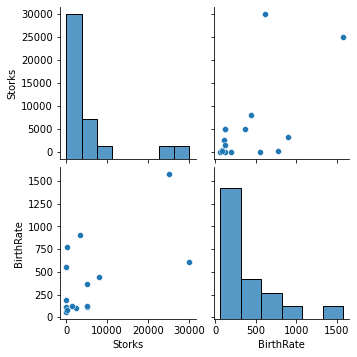

In [5]:
#scatter plot matrix to visualise the movement of the 2 variables
sns.pairplot(df[['Storks','BirthRate']])
plt.show()

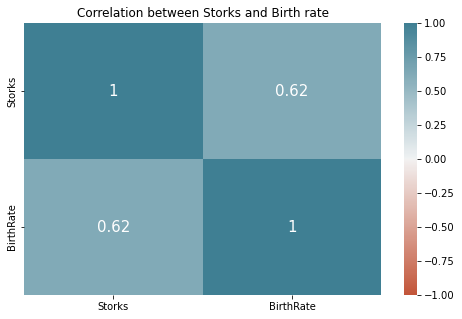

In [6]:
#plotting a heatmap with Pearson correlation coefficient
fig,ax = plt.subplots(1,1, figsize=(8,5))
sns.heatmap(df[['Storks','BirthRate']].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
plt.title('Correlation between Storks and Birth rate')
plt.show()

The heatmap proves the positive correlation between the 2 variable, with a correlation coefficient of 0.62. This nudges us towards a possibility that an increase in the number of storks would also result in an increase in the birth rate of a given country. However, to explain the variability of birth rates in the countries of the dataset, we can perform a regression on 'Storks' and 'Birth rate'

### 3. Regression fit and residuals

In [7]:
#Splitting the dataset into predictor and target
X = np.array(df['Storks']).reshape(-1,1)
y = df['BirthRate']

#instantiating the regression model to fit the predictor and target
reg = LinearRegression().fit(X,y)


Text(0, 0.5, 'Actual Value')

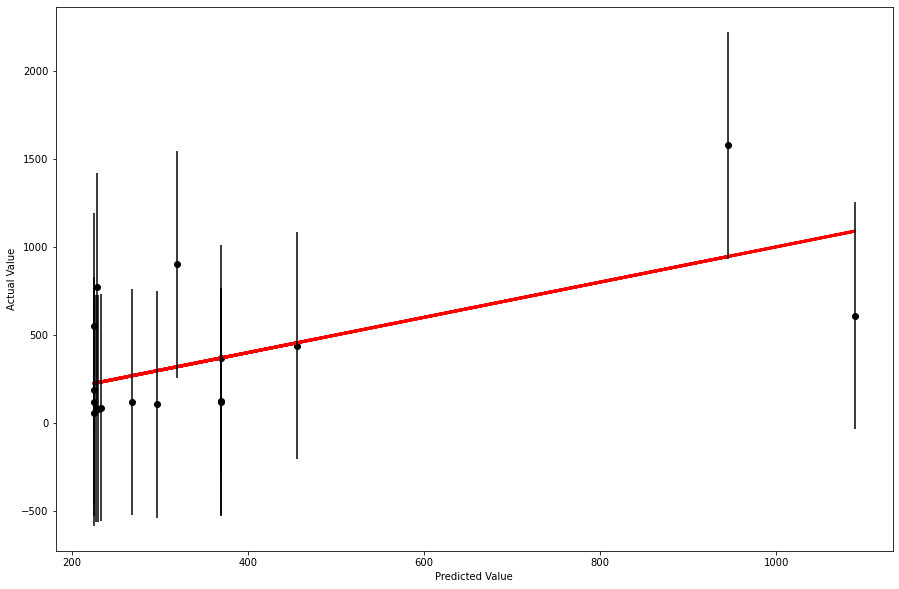

In [8]:
#plot a regression line to display the values predicted by the model vs actual values
y_pred = reg.predict(X)
residuals = y_pred - y

fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_pred, y,  color='black')
a.plot(y_pred, y_pred, color='red', linewidth=3)


two_std = residuals.std() * 2
a.errorbar(y_pred, y, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### 4. Coefficient of determination

In [9]:
print('The R^2 coefficient of determination is %4.3f' % reg.score(X, y))


The R^2 coefficient of determination is 0.385


**Discussion**

- The R^2 coefficient is also known as coefficient of determination. It usually ranges from 0 to 1, where 0 describes the least variability of the model and 1 with the most variability.
- The R^2 coefficient with the 'Storks' as a predictor explains 38.5% variability in the birth rate of the countries in the dataset.

- As per our results with the R^2 coefficient, the regression plot above supports the claim. 
- It is evident that although there seems to be a positive correlation between the actual value and the predicted value of the model, we can see that regression line does not explain the scatter plot. 
- The error bars on the data points explicitly show the distance between the predicted and the actual value, thus proving that the model does not explain more than 50% of the data for the given predictor.

### Model 2 

### 1. Exploratory data analysis of variables

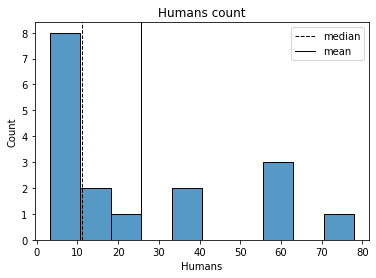

In [10]:
#Visualising the distribution for the predictor variable - Storks
sns.histplot(df['Humans'],bins = 10)
plt.axvline(df.Humans.median(), color='k', linestyle = 'dashed', linewidth= 1, label = 'median')
plt.axvline(df.Humans.mean(), color = 'k', linestyle = 'solid', linewidth = 1, label = 'mean')
plt.xlabel('Humans')
plt.ylabel('Count')
plt.legend(loc = 'upper right')
plt.title('Humans count')
plt.show()

### 2. Correlation between predictor and target

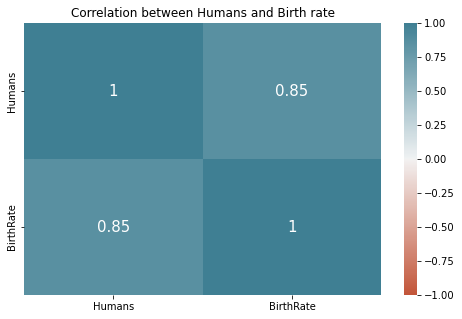

In [11]:
#plotting a heatmap with Pearson correlation coefficient
fig,ax = plt.subplots(1,1, figsize=(8,5))
sns.heatmap(df[['Humans','BirthRate']].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})
plt.title('Correlation between Humans and Birth rate')
plt.show()

### 3. Regression fit and residuals

In [12]:
#Splitting the dataset df into predictor- Humans and target- birth rate
X_2 = np.array(df['Humans']).reshape(-1,1)
y_2 = df['BirthRate']

In [13]:
#instantiating the regression model to fit the predictor and target
reg2 = LinearRegression().fit(X_2,y_2)


Text(0, 0.5, 'Actual Value')

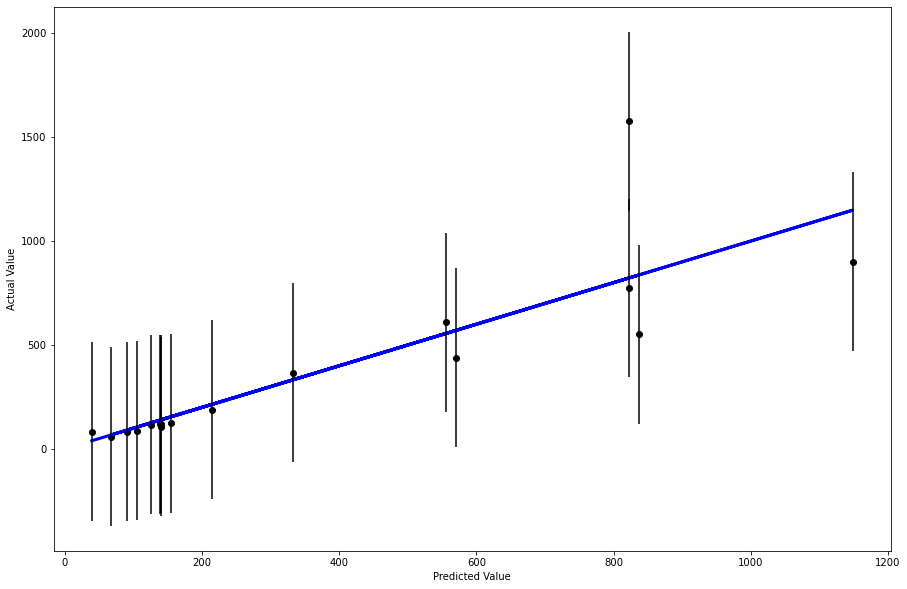

In [14]:
#plotting the predicted values vs actual values for humans and birth rate
y_pred2 = reg2.predict(X_2)

residuals_2=(y_pred2 - y_2)

fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_pred2, y_2,  color='black')
a.plot(y_pred2, y_pred2, color='blue', linewidth=3)


two_std = residuals_2.std() * 2
a.errorbar(y_pred2, y_2, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### 4. Coefficient of determination

In [15]:
print('The R2 coefficient of determination is %4.3f' % reg2.score(X_2, y_2))

The R2 coefficient of determination is 0.725


In [16]:
#comparing the effect of coefficients on birth rate
coeff_parameters= pd.DataFrame(reg.coef_).T
coeff_parameters.columns = ['Storks']

coeff_parameters['Humans'] = reg2.coef_
coeff_parameters

,Storks,Humans
0,0.028794,14.834445


**Discussion**

- The R^2 coefficient for 'Model 2' with 'Humans' as the predictor generates a variability of about 72.5%
- The regression line shows a strong positive relationship between the 2 variables by explaining 72.5% of the data. 
- There does seem to be a substantiate evidence of the correlation, however, the model exhibits error at higher predicted values of the data. 

- As already discussed on the effect of the predictors on the target variable 'BirthRate', we can see the difference in their coefficients.
- The model with 'Humans' as predictors has a coefficient that is higher than the model with 'Storks' by  199.225%. 
- From a logical point of view, it is only fair the model predicts so since the birth rate points to human babies. 

## Analysis 1B

A bootstrap sample is a sample taken from the observed dataset with replacement. Here, we use the bootstrap technique to resample the data with replacement and compute the difference in the R^2 values.  
These differences are then plotted to visualise the distribution for the 2 models. 

### 1. Bootstrap function definition

In [17]:
import scipy.stats as stats
from sklearn.utils import resample

#defining a function to resample the data
def bootstrapC(data, cols, repeats, func):
    result = pd.DataFrame(data = dict([(c, np.empty(repeats)) for c in cols]))
        
    for i in range(0, repeats):
        result.iloc[i]=func(resample(data)) # default is to resample, same size
    return result

### 2. Regression function definition

In [18]:
#defining a function to perform regression on both the models and return its difference in R^2 value
def doRegression_diff(df):
    y = df.BirthRate
    X1 = np.array(df.Storks).reshape(-1,1)
    X2 = np.array(df.Humans).reshape(-1,1)
    
    reg1 = LinearRegression().fit(X1,y)
    reg2 = LinearRegression().fit(X2,y)
    beta_storks = reg1.coef_
    beta_humans = reg2.coef_
    
    return [reg2.score(X2,y) - reg1.score(X1,y)]

In [19]:
bstrap_diff = bootstrapC(df,['R2 difference'], 1000, doRegression_diff)

bstrap_diff = pd.DataFrame(bstrap_diff,columns = ['R2 difference'])

### 3. Plotting R^2 difference

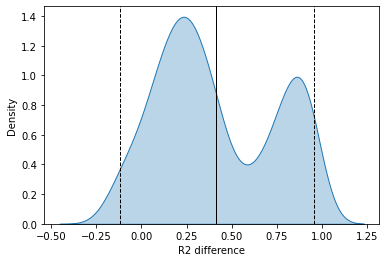

In [20]:
sns.kdeplot(bstrap_diff['R2 difference'], label = 'R2 difference', alpha = 0.3, shade = True)
plt.axvline(bstrap_diff['R2 difference'].quantile(0.025),color = 'k', linestyle = 'dashed', linewidth = 1,label = 'Average')
plt.axvline(bstrap_diff['R2 difference'].quantile(0.975),color = 'k', linestyle = 'dashed', linewidth = 1,)
plt.axvline(bstrap_diff['R2 difference'].mean(),color = 'k', linestyle = 'solid', linewidth = 1)


### 4. Estimating Confidence Interval

In [21]:
print(" The confidence interval of 95 percent for the R^2 difference in model 1 and 2 is from %3.2f to %3.2f " % 
      ( bstrap_diff.quantile(0.025),bstrap_diff.quantile(0.975)))


 The confidence interval of 95 percent for the R^2 difference in model 1 and 2 is from -0.12 to 0.96 



- The R^2 difference using bootstrap technique displays a bimodal distribution. 
- Since the distribution is bimodal, a confidence interval of 95% would exhibit the best results.
- The presence of a bimodal distribution indicates the combination of the 2 groups; each with its own underlying condition. 
- Since the distribution is bimodal, it demontrates that the difference in variance of residual between the 2 models ranges between -0.12 to 0.96 with 95% confidence. 
- As we can see that 95% of values fall between -0.12 to 0.96, the number of values that contain a negative difference are approximate 8% of the bootstrap samples. 
- The negative R^2 depicts the possibility of Model 1 with a higher variability than model 2. Since the number of positive R^2 differences occupy 91.5% of the bootstrap samples, we can confirm that the model 2 explains variability better than model 1. 

In [22]:
(bstrap_diff['R2 difference']< 0).value_counts()

False    915
True      85
Name: R2 difference, dtype: int64

## Analysis 2A

### Model 1 

In this analysis, we aim to predict the number of storks by using the land area as a predictor variable. The previous analysis aimed to predict the birth rate by using the goodness of fit measure 'R^2'. We could visualise that the bootstrapped distribution of the data was bimodal, giving rise to the interpretation that the bimodality is due to the presence of 2 models that explain variability with a vast difference. 


### 1. Correlation between predictor and target

<AxesSubplot:>

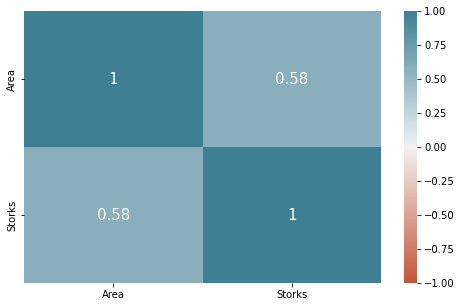

In [23]:
#Visualising the correlation between the predictor and target
fig,ax = plt.subplots(1,1, figsize=(8,5))

sns.heatmap(df[['Area','Storks']].corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})

It is interesting to note that the correlation between Storks and birth rate of human babies was higher than the correlation between Storks and the land area. 

### 2. Regression fit and residuals

In [24]:
#splitting the dataset into predictor and target
y1 = df['Storks']
X1 = np.array(df.Area).reshape(-1,1)

In [25]:
#instantiatinf the model for the variables
reg_m1 = LinearRegression().fit(X1,y1)
print("The regression coefficient for Area is : ", format(reg_m1.coef_))
print("The regression intercept for Model 1 is : ", format(reg_m1.intercept_))

The regression coefficient for Area is :  [0.02330737]
The regression intercept for Model 1 is :  -60.686852327103225


Text(0, 0.5, 'Actual Value')

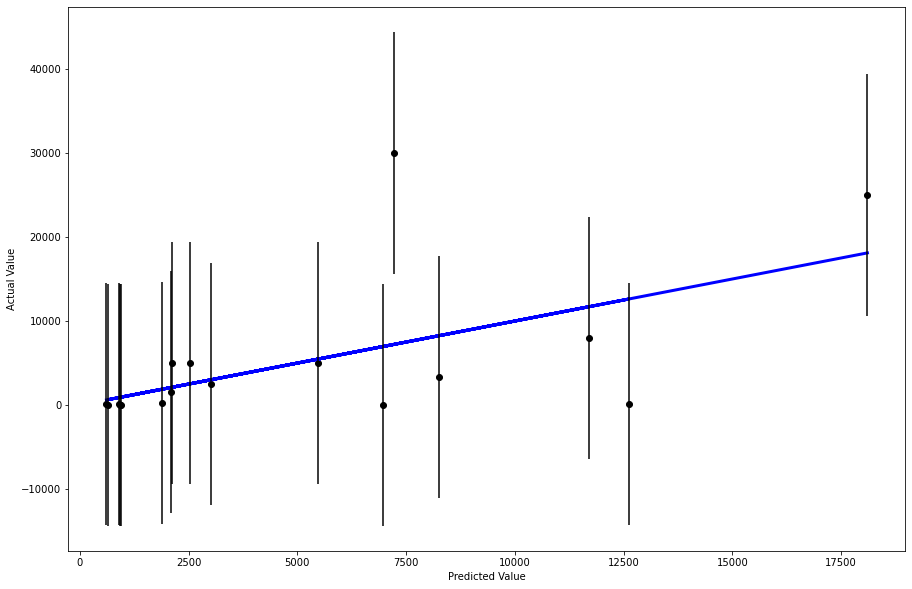

In [26]:
#plotting the predictions vs actual value for stork pairs
y_pred_m1 = reg_m1.predict(X1)
residuals_m1 = y_pred_m1 - y1

fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_pred_m1, y1,  color='black')
a.plot(y_pred_m1, y_pred_m1, color='blue', linewidth=3)


two_std = residuals_m1.std() * 2
a.errorbar(y_pred_m1, y1, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

The regression model with Storks as a predictor performs poorly in comparison to the models from Analysis 1. This regression consists of a negative intercept. It conveys the possibility of obtaining an expected result that is less than 0 when the predictor is set to the origin. 

### 3. Root Mean Squared 

In [27]:
from sklearn.metrics import mean_squared_error as mse

mse_m1 = mean_squared_error(y1,y_pred_m1)
mse_m1

48786968.14209523

In [28]:
rmse_m1 = np.sqrt(mse_m1)
print(f"The RMSE for model 1 with the predictor as land area and predicted value as storks : {rmse_m1}")

The RMSE for model 1 with the predictor as land area and predicted value as storks : 6984.766863832696


Using the Root Mean Squared Error as the metric for the regression model, we can see that the RMSE is an effectively large value. Since the errors are roots of squared values, higher errors consist of a higher weight in this metric. 

## Model 2

The model in this analysis uses a predictor that can be derived from 2 other columns of the dataset; 'Population density'. The predictors for Model 2 of the analysis are 'SuitableAreaPercent' and 'Population_density' and the target variable being 'Storks'

### 1. Correlation estimation

In [29]:
#deriving population density
df['Population_density'] = ((df['Humans'] * 10**6)/ df['Area']).round(2)

In [30]:
df

,Country,Area,Storks,Humans,BirthRate,SuitableAreaPercent,Population_density
0,Albania,28750,100,3.2,83,55.68,111.30
1,Austria,83860,300,7.6,87,38.34,90.63
2,Belgium,30520,1,9.9,118,65.93,324.38
3,Bulgaria,111000,5000,9.0,117,57.99,81.08
4,Denmark,43100,9,5.1,59,81.46,118.33
5,France,544000,140,56.0,774,58.47,102.94
6,Germany,357000,3300,78.0,901,59.81,218.49
7,Greece,132000,2500,10.0,106,47.31,75.76
8,Holland,41900,4,15.0,188,70.96,358.00
9,Hungary,93000,5000,11.0,124,75.86,118.28


In [31]:
df_m2 = df.loc[:,('Population_density','SuitableAreaPercent','Storks')]

<AxesSubplot:>

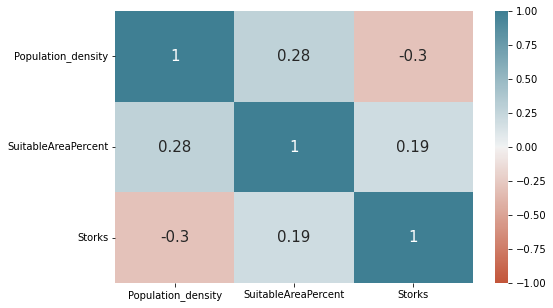

In [32]:
#plotting the correlation coefficients using the heatmap
fig,ax = plt.subplots(1,1, figsize=(8,5))

sns.heatmap(df_m2.corr(), vmin=-1, vmax=1, cmap=sns.diverging_palette(20, 220, as_cmap=True), 
            annot=True, ax=ax, annot_kws={"size": 15})

### 2. Regression fit and residuals

In [33]:
#splitting the dataset into predictors and target
y_m2 = df_m2['Storks']
X2 = np.column_stack((df_m2.Population_density,df_m2.SuitableAreaPercent))

In [34]:
#instantiating the model for the variables
reg_m2 = LinearRegression().fit(X2,y_m2)
beta_density, beta_area = reg_m2.coef_
print(f"The regression coefficients for density and area are {beta_density},{beta_area}")
print("The regression intercept for Model 2 is : ", format(reg_m2.intercept_))

The regression coefficients for density and area are -39.69818687419282,240.91891408543162
The regression intercept for Model 2 is :  -3728.737727961785


In [35]:
#computing the effect of the predictor 
maxSuitable = df_m2.SuitableAreaPercent.max()
maxdensity = df_m2.Population_density.max()
print(f"The effect of increase in suitable breeding grounds for storks at maximum value {maxSuitable} percent is an increase in number of stork pairs by {(reg_m2.coef_[1]* 100).round(2)}  per year")
print(f"The effect of increase in human population density at maximum value {maxdensity} per km^2 is a decrease in number of stork pairs by {-1*(reg_m2.coef_[0] * 100).round(2)}  per year")


The effect of increase in suitable breeding grounds for storks at maximum value 81.46 percent is an increase in number of stork pairs by 24091.89  per year
The effect of increase in human population density at maximum value 358.0 per km^2 is a decrease in number of stork pairs by 3969.82  per year


Text(0, 0.5, 'Actual Value')

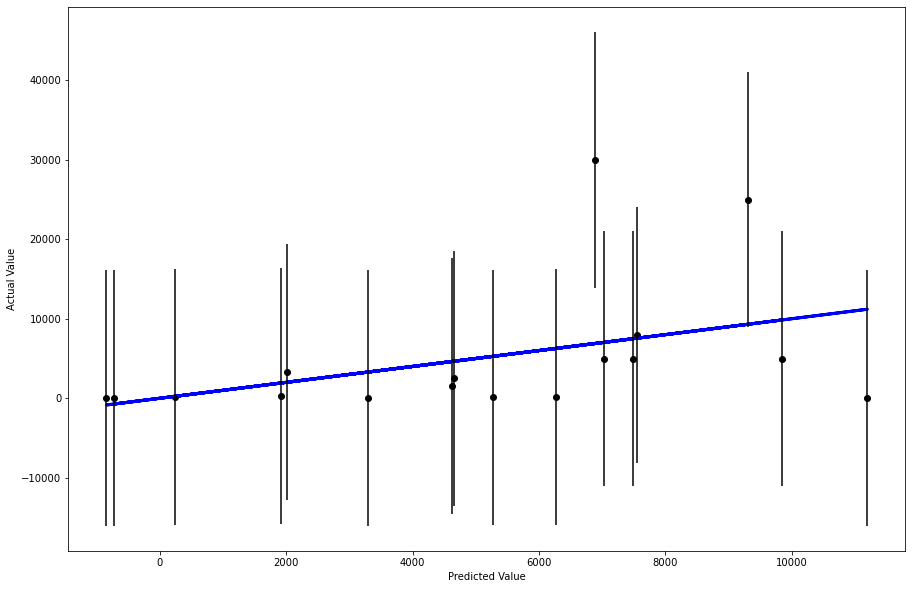

In [36]:
y_pred_m2 = reg_m2.predict(X2)
residuals_m2 = y_pred_m2 - y_m2

fig, a = plt.subplots(1,1,figsize=(15,10))
a.scatter(y_pred_m2, y_m2,  color='black')
a.plot(y_pred_m2, y_pred_m2, color='blue', linewidth=3)


two_std = residuals_m2.std() * 2
a.errorbar(y_pred_m2, y_m2, yerr=two_std, fmt='.k')

a.set_xlabel('Predicted Value')
a.set_ylabel('Actual Value')

### 3. Root Mean Squared Error

In [37]:
mse_m2 = mean_squared_error(y_m2,y_pred_m2)
rmse_m2 = np.sqrt(mse_m2)
print(f"The RMSE for model 2 with predictors Population density and suitable area percentage : {rmse_m2}")

The RMSE for model 2 with predictors Population density and suitable area percentage : 7800.968241181438


**Discussion** 

- Model 2 consists of predictors - population density and suitable area percentage. 
- The effect of the 2 predictors on the target variable Storks is conflicting. The increase in the number of suitable area percentage for storks predicts an increase in the number of pairs of storks whereas the increase in population density results in a decrease. 
- As discussed earlier, the RMSE is influenced by variance in residuals. The larger the error, the higher we obtain the RMSE.
- In comparison to model 1 in Analysis 2A, model 2 generates higher RMSE by 11%. 
- This gives rise to a question if the model does not fit the data in reality. 

## Analysis 2B

This analysis aims to resample the dataset using bootstrap technique similar to Analysis 1B but the bootstrapping metric is chosen as the RMSE of model 1 and model 2. 

We aim to estimate the difference in RMSE between the 2 models by passing the regression models to the bootstrap function as arguments. 

### 1. Regression function definiton

In [38]:
#defining a function to compute the regression and returning the difference in RMSE of the 2 models. 
def doRegression_rmse(df):
    y = df.Storks
    X1 = np.array(df.Area).reshape(-1,1)
    X2 = np.column_stack((df.Population_density,df.SuitableAreaPercent))    
    reg1 = LinearRegression().fit(X1,y)
    reg2 = LinearRegression().fit(X2,y)
    
    y_pred1 = reg1.predict(X1)
    y_pred2 = reg2.predict(X2)
    
    rmse_1 = np.sqrt(mse(y,y_pred1))
    rmse_2 = np.sqrt(mse(y,y_pred2))
                     
    
    return [rmse_2 - rmse_1]

In [39]:
#Using bootstrap function from Analysis 1B
#creating a separate pandas dataframe for the bootstrapped RMSE difference
bstrap_rmse = bootstrapC(df, ['RMSE_diff'], 1000, doRegression_rmse)


### 2. Plotting RMSE difference

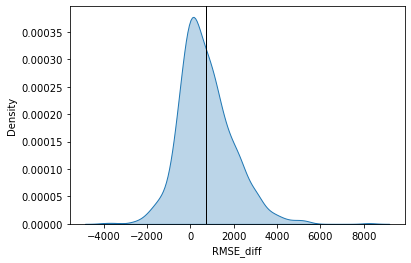

In [40]:
sns.kdeplot(bstrap_rmse['RMSE_diff'], label = 'RMSE difference', alpha = 0.3, shade = True)
plt.axvline(bstrap_rmse['RMSE_diff'].mean(),color = 'k', linestyle = 'solid', linewidth = 1)




### 3. Estimating confidence intervals 

In [41]:
print("The average difference between the RMSE for model 1 and model 2 is %3.2f with 90 percent CI from %3.2f to %3.2f " % 
      (bstrap_rmse['RMSE_diff'].mean(), bstrap_rmse.quantile(0.05),bstrap_rmse.quantile(0.95)))


The average difference between the RMSE for model 1 and model 2 is 718.59 with 90 percent CI from -969.99 to 2962.71 


In [42]:
(bstrap_rmse['RMSE_diff']>0).value_counts()

True     704
False    296
Name: RMSE_diff, dtype: int64

- The RMSE difference distribution almost exhibits a normal curve unlike the bimodal distribution in Analysis for R^2 coefficient.
- The average difference in RMSE between the 2 models is 718.59. 
- The 90% confidence interval depicts that the difference values within this confidence interval range from -969.99 to 2962.71. 
- Just as the initial results for the RMSE of model 2 were higher than the RMSE for model 1, the bootstrap sampling for the difference in RMSE shows that although model 2 has a lower residual variance than model 1, the samples with a negative RMSE value in the distribution constitute to about 30% of the entire sample dataset. 
- Although ideally we would choose model 1 over model 2, both the models do not exhibit favourable characteristics. 
- As far as the model that explains better variability is concerned, model 1 does so. 

## Summary

The objective of the analysis was to investigate the relationships amongst the variables from the storks-babies dataset. The predictor variable for each analysis where changed according to the objective - to analyse the relationship for the birth rate in Analysis 1 and the number of stork pairs in Analysis 2. 

We further went to compute the coefficient of determination for the 2 models in Analysis 1, subsequently using the bootstrap sampling technique to reduce the uncertainty in our result. 

- The correlation relationship between the number of storks to the birth rate was positive. However, this did not pave way to proving that the regression model could explain the variability in the dataset. The model was only able to explain about 38.5% of the data. 
- The correlation relationship between the number of humans to birth rate was subsequently higher than those of storks, while also proving that this model explains the data better with a variability of 72.5%. 
- The bootstrapped sampling of the 2 models provided us with a bimodal distribution for R^2. The bimodality of the distribution could prove that the data consists of 2 groups of values with its own underlying condition.
- The Confidence interval of 95% (which is much more suitable for bimodal distribution) displays an R^2 difference between the 2 models 


- Analysis 2 displayed an analysis between the rest of the variables and the number of storks. 
- The correlation relationship between the number of storks was surprisingly lower than that of storks vs birth rate. This may have been with respect to underlying factors we may not be aware of through this limited data. 
- The regression fit for Model 1 does not display an ideal fit as it does generate an RMSE of approx. 6800.767. 
- Model 2 uses a new variable - 'Population density' as one of the 2 predictors, the other being Suitable area percentage for storks. This model does not garner much of a favourable result as much as the former. The correlation amongst the variables were weak although slightly positive. 
- Much to its obvious trajectory, the RMSE for Model 2 was higher than that of 1. 
- By bootstrapping the 2 models to compute the RMSE distribution, we could prove its performance. Hence model 1 explaining a better variability than model 2 (if not the best). 